# Perceptron

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from ann.tf.perceptron import perceptron

In [33]:
# Load data
data = np.genfromtxt('https://raw.githubusercontent.com/rasbt/deep-learning-book'
                     '/master/code/ch02_perceptron/perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :-1], data[:, -1]
y = y.astype(np.int)
num_features = X.shape[1]

# Initialize graph
g = tf.Graph()
with g.as_default() as g:
    perceptron(num_features=num_features)
    
# Train perceptron
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(1, 4):
        for example, target in zip(X, y):
            feed_dict = {'features:0': example.reshape(-1, num_features),
                         'targets:0': target.reshape(-1, 1)}
            _ = sess.run('train:0', feed_dict=feed_dict)
    
        pred = sess.run('predict:0', feed_dict={'features:0': X})
        train_error = np.sum(pred.reshape(-1) != y) / X.shape[0]
        print('Training error epoch %d: %.2f' % (epoch, train_error))
    
    weights, bias = sess.run(['weights:0', 'bias:0'])
    print('Weights:\n', weights)
    print('Bias', bias)

Training error epoch 1: 0.02
Training error epoch 2: 0.00
Training error epoch 3: 0.00
Weights:
 [[ 4.29999971]
 [ 2.28999972]]
Bias [[-5.]]


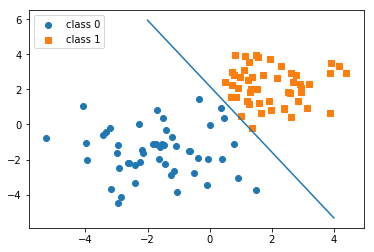

In [32]:
x_min = -2
y_min = ( -(weights[0] * x_min) / weights[1]
          -(bias[0] / weights[1]) )

x_max = 4
y_max = ( -(weights[0] * x_max) / weights[1]
          -(bias[0] / weights[1]) )

fig, ax = plt.subplots(1)

ax.plot([x_min, x_max], [y_min, y_max])
ax.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
ax.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')

ax.legend(loc='upper left')
plt.show()